<p style="font-family: Georgia; line-height: 2; font-size: 21px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #EF233C">Exploratory Data Analysis of Television Brands available in the Indian Market</p>

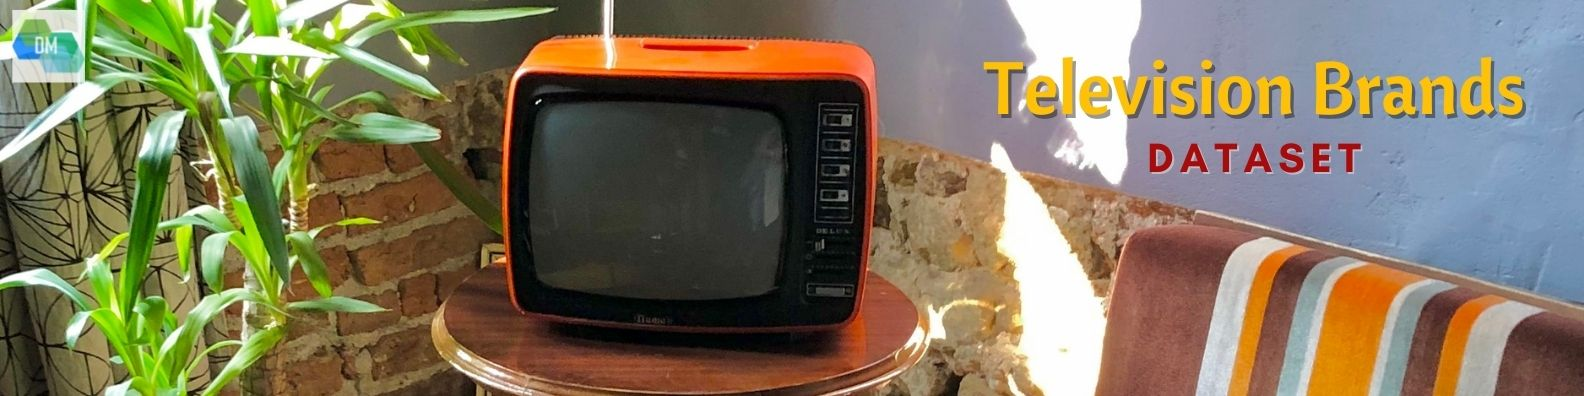

<p style="font-family: Georgia; line-height: 2;color:#3a0ca3; font-size: 17px; font-weight: bold; letter-spacing: 2px; text-align: center; ">This notebook uses a Television dataset which has been collected from an e-commerce website Flipkart using webscraping technique.</p>

<h3 style="font-family: Arial;background-color:#ffb3c1;color:white;text-align: center;font-size: 30px;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Dataset Details </centre></strong></h3>

This dataset contains `912` samples with `7` attributes. There are some missing values in this dataset.
Here are the columns in this dataset-

1.   **Brand**: This indicates the manufacturer of the product i.e. Television
2.   **Resolution**: This has multiple categories and indicates the type of display i.e. LED, HD LED, etc.
3.  **Size**: This indicates the screen size in inches
4.  **Selling Price**: This column has the Selling Price or the Discounted Price of the product
5.   **Original Price**: This includes the Original Price of the product from the manufacturer.
6.   **Operating system**: This categorical variable shows the type of OS like Android, Linux, etc.
7.   **Rating**: Average customer ratings on a scale of 5.

<h3 style="font-family: Arial;background-color:#ffb3c1;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>This EDA will answer some interesting questions like- </centre></strong></h3>

1. Demand for different types of televisions and Number of Players in the market
2. Which are the top 5 brands for television?
3. Which brand has the highest number of products i.e. television ?
4. Are televisions with higher ratings more expensive?
5. Average Selling Price by Brand

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="font-family: Trebuchet MS;background-color:#ffb3c1;color:white;font-size: 20px;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝  </centre></strong></h3>

In [43]:
df = pd.read_csv('../input/television-brands-ecommerce-dataset/TV_Final.csv')

<h3 style="font-family: Trebuchet MS;background-color:#ffb3c1;color:white;font-size:20px;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>EDA 🔍  </centre></strong></h3>

In [44]:
df.shape

(912, 7)

In [45]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [46]:
df['Brand']=df['Brand'].replace(['Samsung'],'SAMSUNG')

In [47]:
df.dtypes

Brand                object
Resolution           object
Size                  int64
Selling Price         int64
Original Price        int64
Operating System     object
Rating              float64
dtype: object

In [48]:
df.nunique()

Brand                58
Resolution            5
Size                 27
Selling Price       515
Original Price      455
Operating System      7
Rating               25
dtype: int64

In [49]:
df['Brand'].nunique()

58

In [50]:
df['Resolution'].unique()

array(['Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED',
       'HD Plasma'], dtype=object)

In [51]:
df['Operating System'].unique()

array(['VIDAA', 'Android', 'Linux', nan, 'Tizen', 'WebOS', 'HomeOS',
       'FireTV OS'], dtype=object)

In [52]:
df.isnull().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

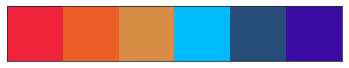

In [53]:
#color palette for this notebook
colors = ["#EF233C","#eb5e28","#d68c45","#00bbf9","#274c77","#3a0ca3"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

In [54]:
# count of products by Resolution
df['Brand'].groupby(df['Resolution']).count().sort_values(ascending=False)

Resolution
Ultra HD LED     399
HD LED           229
Full HD LED      220
QLED Ultra HD     60
HD Plasma          4
Name: Brand, dtype: int64

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>There seems to a higher demand for Digital TVs, especially LED TVs as top three categories are all different types of LED TVs.</centre></h3>

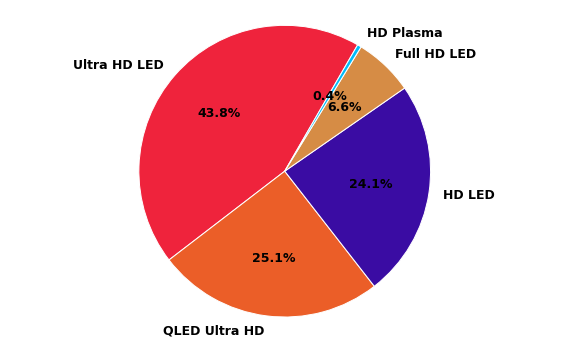

In [55]:
# Device Type distribution

labels = 'Ultra HD LED', 'QLED Ultra HD', 'HD LED', 'Full HD LED','HD Plasma'
sizes = [399,229,220,60,4]
fig, ax = plt.subplots(figsize=(10,6))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#EF233C","#eb5e28","#3a0ca3","#d68c45","#00bbf9"],autopct='%1.1f%%', startangle=60,textprops={'color':'black','weight':'bold','fontsize':12.5})
ax.axis('equal')
plt.show()

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>Ultra HD LED TV seems to be in greater demand as more than 40% of the products categorized as 'Television' on the website are of this type. </centre></h3>

In [56]:
#Which are the top 5 brands for TV?
df['Brand'].groupby(df['Brand']).count().sort_values(ascending=False).iloc[:5]

Brand
SAMSUNG      146
LG           122
SONY          62
TCL           44
Panasonic     30
Name: Brand, dtype: int64

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>Brand 'Samsung' clearly offers the maximum number of Televisions in the market closely followed by LG. While brands like Sony, TCL and Panasonic offer quite lesser number of products when compared to these two brands.</centre></h3>

<AxesSubplot:xlabel='count', ylabel='Brand'>

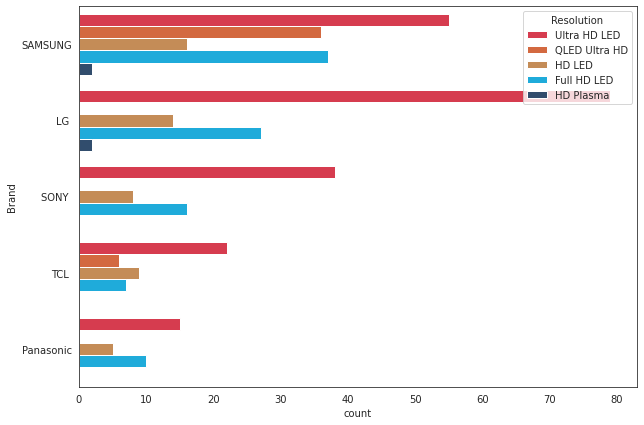

In [57]:
#Brands and Resolution
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Brand", hue="Resolution", data=df, palette=colors,order=df["Brand"].value_counts().iloc[:5].index)

<h3 style="font-family:Arial ;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>While Samsung offers products in all Resolution categories, LG does not offer a type 'QLED Ultra HD'.</centre></h3>

In [58]:
#Are TVs with higher ratings more expensive or do expensive TVs from well-known brands have higher ratings indicating premium quality?
round(df.groupby('Brand')['Rating'].mean().sort_values(ascending=False),1)

Brand
SONY                4.5
OnePlus             4.4
Hisense             4.4
Haier               4.4
Vu                  4.4
TOSHIBA             4.4
MOTOROLA            4.3
Mi                  4.3
Compaq              4.3
Onida               4.3
Thomson             4.3
Onix                4.3
Dektron             4.3
KODAK               4.3
iFFALCON by TCL     4.3
LG                  4.3
realme              4.3
MarQ by Flipkart    4.3
Nokia               4.3
SAMSUNG             4.3
Coocaa              4.2
Blaupunkt           4.2
Weston              4.2
TCL                 4.2
Sanyo               4.2
Infinix             4.2
Intex               4.2
Panasonic           4.2
IMPEX               4.1
Croma               4.1
Sansui              4.1
Micromax            4.1
PHILIPS             4.1
HUIDI               4.1
CloudWalker         4.1
Candes              4.1
Lloyd               4.1
JVC                 4.0
DETEL               4.0
LumX                4.0
Acer                3.9
RGL       

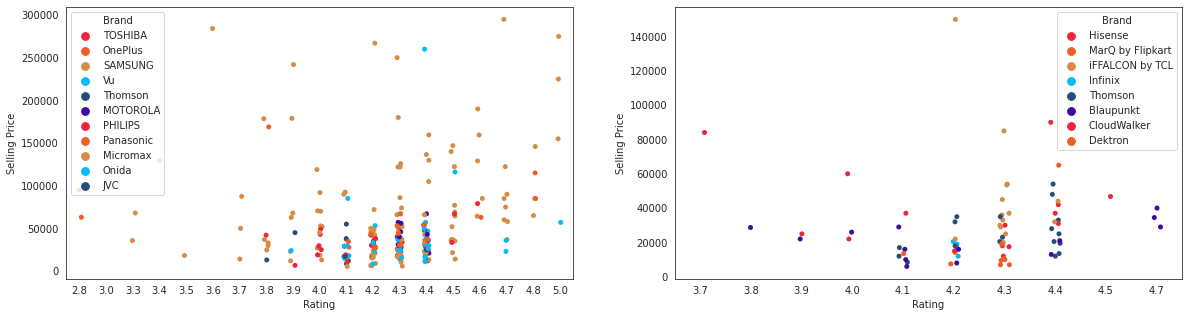

In [59]:
# Rating vs Selling Price
#filter by Known Brands
list1 = ["SONY","OnePlus","Haier","Vu","TOSHIBA","MOTOROLA","Mi","Compaq","Onida","Thomson",
        "KODAK","LG","realme","SAMSUNG","Nokia","Panasonic","Sansui","Micromax","PHILIPS","Samsung","JVC"]

list2 = ["Hisense","Thomson","Onix","KODAK","Dektron","iFFALCON by TCL","MarQ by Flipkart","Nokia","Coocaa","Blaupunkt","Weston","TCL",
        "Infinix","Sanyo","Intex","IMPEX","Croma","HUIDI","CloudWalker","Lloyd", 
        "Candes","Detel","LumX"]
series1 = df["Brand"].isin(list1)
series2 = df["Brand"].isin(list2)
df_f1= df[series1]
df_f2= df[series2]
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
ax1 = sns.stripplot(x="Rating", y="Selling Price", data=df_f1,hue="Brand", palette=colors,ax=axs[0])
ax2 = sns.stripplot(x="Rating", y="Selling Price", data=df_f2,hue="Brand", palette=colors,ax=axs[1])

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>The first plot on the left side shows well-known Brands with expensive TVs and their ratings while the second one on the right shows new and lesser-known brands with their selling prices and ratings. From the second plot, even the lesser known brands have a higher rating >4.0. So, it is possible that ratings are not highly influnced by brand name alone.</centre></h3>

In [60]:
import altair as alt
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='Original Price',
    y='Selling Price',
    color='Brand',
    tooltip=['Brand', 'Selling Price', 'Original Price']
).interactive()

alt.Chart(...)

<h3 style="font-family: Arial;color:#eb5e28;text-align:left;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><strong>Average selling price by Resolution</strong></h3>

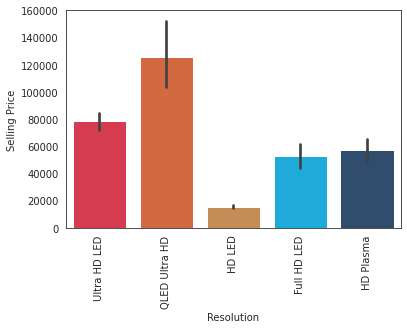

In [61]:
sns.barplot(x=df['Resolution'], y=df['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

<h3 style="font-family:Arial;color:#eb5e28;text-align: left;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><strong>Average selling price by Brand</strong></h3>

In [62]:
# Brandwise Mean Selling prices
df.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Brand
Sharp               149672.0
SAMSUNG             107035.0
LG                   96915.0
Hisense              89796.0
SONY                 89343.0
TCL                  55799.0
iFFALCON by TCL      54235.0
Panasonic            53494.0
Akai                 52003.0
OnePlus              47376.0
Vu                   46650.0
Compaq               45999.0
Sanyo                45499.0
Weston               43390.0
Oxygen               40327.0
Nokia                38863.0
TOSHIBA              38853.0
MOTOROLA             38399.0
Sansui               37672.0
Haier                36617.0
AISEN                35463.0
BPL                  34618.0
Onix                 34217.0
Lloyd                34162.0
PHILIPS              34114.0
JVC                  32497.0
CloudWalker          32332.0
Acer                 31665.0
Mi                   30788.0
Power Guard          30510.0
Onida                29708.0
IMPEX                28820.0
Intex                27341.0
Micromax             26870.0
Thomson 

In [68]:
#filter dataframe
df_p1=df_f1[(df_f1["Selling Price"] >=10000) & (df_f1["Selling Price"] <= 100000)]
df_p1.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
5,OnePlus,HD LED,32,15999,19999,Android,4.3


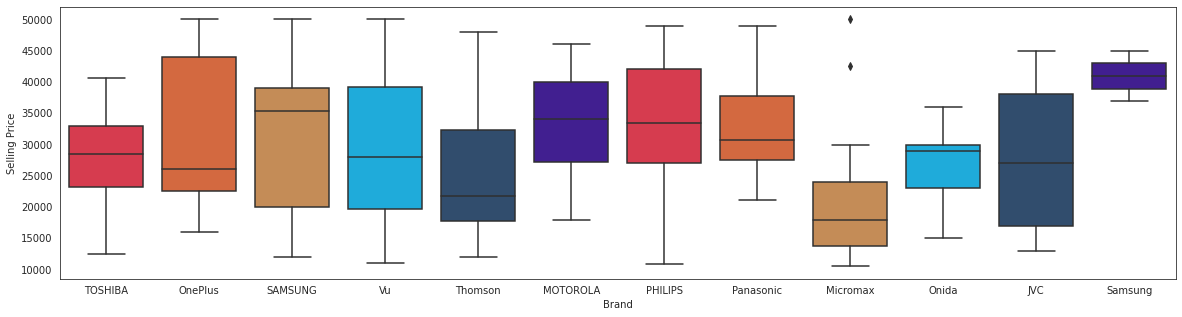

In [69]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df_p,palette=colors)

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>It is clear that from the well-known brands SAMSUNG Televisions are the most expensive while Micromax Televisions are the most affordable ones.</centre></h3>

In [70]:
#filter dataframe
df_p2=df_f2[(df_f2["Selling Price"] >=10000) & (df_f2["Selling Price"] <= 100000)]
df_p2.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
11,Hisense,Ultra HD LED,55,36999,49990,Android,4.4
15,Hisense,Ultra HD LED,70,89999,119990,Android,4.4


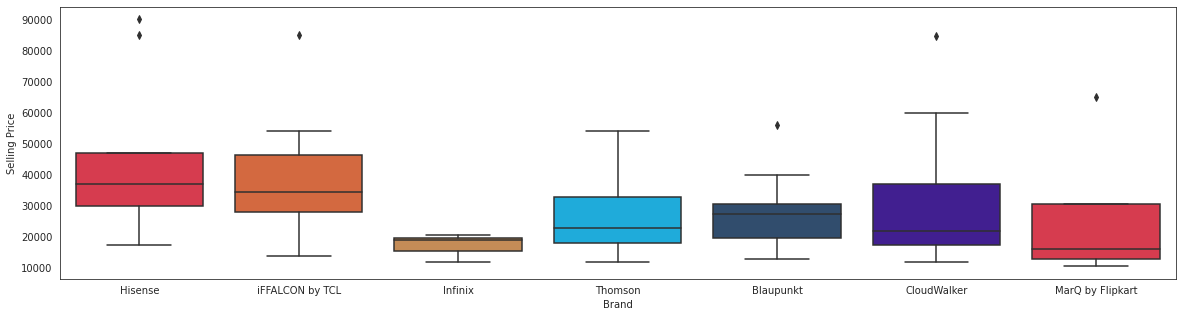

In [71]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df_p2,palette=colors)

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>From the new and upcoming brands Hisense Televisions are the most expensive while MarQ by Flipkart Televisions are the most affordable ones.</centre></h3>

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><strong><centre>Average selling price by Operating System</centre></strong></h3>

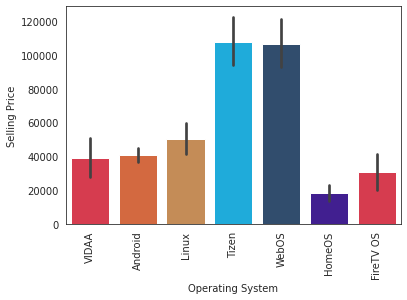

In [67]:
sns.barplot(x=df['Operating System'], y=df['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

<h3 style="font-family: Arial;color:#eb5e28;text-align: center;padding-top: 20px;padding-bottom: 20px;border-radius: 5px 15px;letter-spacing: 0.5px;"><centre>From the above chart, it is clear the Television sets with Tizen and WebOS are most expensive while HomeOS Television sets are the most affordable ones.</centre></h3>

Conclusion:
1. There is a clear demand for different types of televisions looking at the number of products offered by 58 unique brands in the market
2. Brands like SAMSUNG, LG, TOSHIBA seems to be quite popular but there are a number of upcoming brands with competitive products in the market.
3. SAMSUNG has the highest number of products i.e. televisions
4. There is no clear correlation between selling price and higher ratings for televisions
5. Average Selling Price by Brand - Sharp, SAMSUNG and LG are the most expensive brands.

<p style="font-family: Georgia; line-height: 2;color:#3a0ca3; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">If you found this notebook useful, please Upvote. Thanks!</p>